In [14]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean

# SST Maps
Cut out the North Atlantic from 2023 NOAA OISSTv2.1 data

In [33]:
sst_2023 = xr.load_dataset("sst_data/sst.day.mean.2023.nc")
# convert longitudes from 0 to 360 degrees to -180 to 180
sst_2023.coords['lon'] = (sst_2023.coords['lon'] + 180) % 360 - 180
sst_2023 = sst_2023.sortby(sst_2023.lon)
sst_2023_slice = sst_2023[["sst"]].sel(lat=slice(-10,80), lon=slice(-120,60))
sst_2023_slice.to_netcdf(path="sst_data/sst.day.mean.2023.na.nc")

Plot North Atlantic SSTs for Jan. 1st, 2023

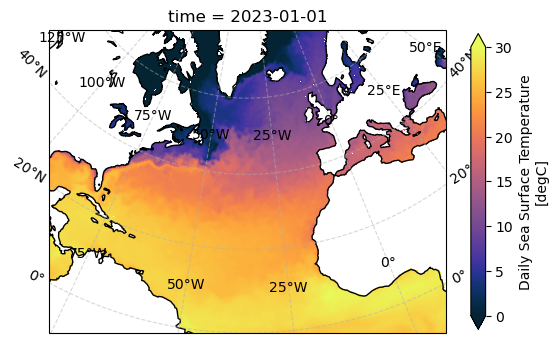

In [34]:
a_day = sst_2023_slice["sst"].sel(time="2023-01-01")
central_lon = -35
central_lat = 35

fig1, ax1 = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
gl = ax1.gridlines(alpha = 0.5, linestyle = "--", draw_labels = True)
ax1.set_extent([-80, 10, 0, 70])
a_day.plot(ax=ax1, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree(), vmin=0, vmax = 30, cbar_kwargs={'shrink': 0.8})

Plot 2023 monthly mean SST for 45 N, 30 W

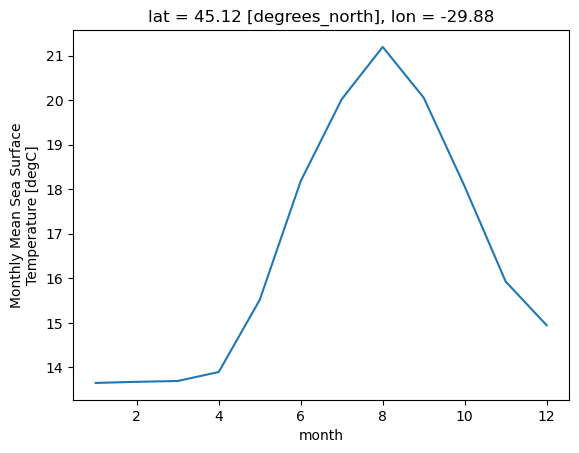

In [35]:
gb = sst_2023.sst.groupby('time.month')
sst_mm = gb.mean(dim="time")
sst_mm.attrs["long_name"] = "Monthly Mean Sea Surface Temperature"
sst_mm_pt = sst_mm.sel(lat=45, lon=-30, method="nearest")
sst_mm_pt.plot()

Plot annual mean North Atlantic SSTs for 2023

Text(0.5, 1.0, '2023 Mean SSTs')

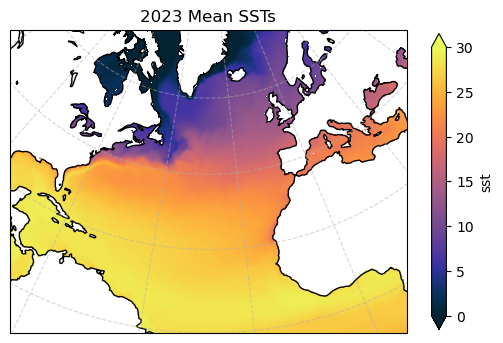

In [37]:
yr_avg = sst_2023_slice["sst"].mean(dim="time")
fig2, ax2 = plt.subplots(subplot_kw={'projection': ccrs.LambertConformal(central_lon, central_lat)})
ax2.coastlines()
ax2.add_feature(cartopy.feature.LAKES, edgecolor='black', facecolor="none")
gl = ax2.gridlines(alpha = 0.5, linestyle = "--")
ax2.set_extent([-80, 10, 0, 70])
yr_avg.plot(ax=ax2, cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree(), vmin=0, vmax = 30, cbar_kwargs={'shrink': 0.8})
ax2.set_title("2023 Mean SSTs")